In [370]:
# import the necessary packages

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression #Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split #simple TT split cv
from sklearn.model_selection import KFold #K-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score #cross validation metrics
from sklearn.model_selection import cross_val_predict #cross validation metrics

%matplotlib inline

## 1. Building a Logistic Regression Model

Using the grad admissions [data](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/GradAdmissions.csv), build a logistic regression model that predicts `Admission` (whether or not a student was admitted) based on ALL the other variables in the data set (EXCEPT `Serial No`, information on the variables can be found [here](https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict_Ver1.1.csv), note that I've added the `Admissions` column to our dataset.)

### 1.1
Z-score your continuous variables
### 1.2
Use Train Test Split to validate your model
### 1.3
Put your coefficients in a data frame and for EACH predictor variable, interpret the coefficient in terms of Log Odds
### 1.4
Add a row to your coefficients data frame and add the coefficients in terms of Odds. For EACH predictor variable, interpret the coefficient in terms of Odds
### 1.5
(MARKDOWN) How well did your model do? Which metrics did you use to support your assessment?

    
## 2. Exploring Logistic Regression Coefficients

### 2.1

Using the coefficients from grad admissions model, manually (using code but not any built-in sklearn functions) calculate the predicted *log odds* of admission for the two students with the following (already z-scored) values:

(hint: if you're confused about how to do this, click [here](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Extras/Hint_HW3.ipynb) for a hint)

|           | GRE Score | TOEFL Score | University Rating | SOP  | LOR  | CGPA | Research |
|-----------|-----------|-------------|-------------------|------|------|------|----------|
| Student 1 | 0.60      | 0.05        | 0.75              | 0.65 | 1.02 | 0.25 | 1        |
| Student 2 | 1.60      | 0.05        | 0.75              | 0.65 | 1.02 | 0.25 | 1        |

Note that the only difference between Student 1 and Student 2 is a *1 unit (standard deviation) increase in GRE score*. 

* 2.1.1 (MARKDOWN) What is the difference (Student 2 - Student 1) in the log odds of the two students? (does that number look familiar?)

Now calculate the predicted *odds* of admission for the two students.

* 2.1.2 (MARKDOWN) What is the ratio (Student 2/Student 1) in the odds of the two students? (does that number look familiar?)

Now calculate the predicted *probability* of admission for the two students.

### 2.2
The following students are from the same data set. Similarly to Students 1&2, the *only difference between Student 3&4 is a 1 unit (standard deviation) increase in GRE score*. To reiterate: the difference between Student 1 and Student 2 is *the same* as the difference between Student 3 and Student 4, but Students 1&2 have different values for the other variables than Students 3&4 do.

|           | GRE Score | TOEFL Score | University Rating | SOP  | LOR  | CGPA | Research |
|-----------|-----------|-------------|-------------------|------|------|------|----------|
| Student 3 | -1.25     | 0.24        | 0                 | 0.56 | -1   | -0.1 | 0        |
| Student 4 | -0.25     | 0.24        | 0                 | 0.56 | -1   | -0.1 | 0        |

Calculate the *log odds* of admission for the two students.

* 2.2.1 (MARKDOWN) What is the difference (Student 4 - Student 3) in the log odds of the two students? (does that number look familiar?)

Now calculate the predicted *odds* of admission for the two students.

* 2.2.2 (MARKDOWN) What is the ratio (Student 4/Student 3) in the odds of the two students? (does that number look familiar?)

Now calculate the predicted *probability* of admission for the two students.

### 2.3

* 2.3.1 (MARKDOWN) Is the difference in log odds the same for the two pairs (1&2 and 3&4) of students?
* 2.3.2 (MARKDOWN) Is the ratio of  odds the same for the two pairs (1&2 and 3&4) of students?
* 2.3.3 (MARKDOWN) Is the difference in probability OR the ratio of probabilities the same for the two pairs (1/2 and 3/4) of students? 
* 2.3.4 (MARKDOWN) Using the information you learned in lectures and classwork, explain *why* the differences/ratios may be constant for some of these measures(log odds, odds, probabilities...) but not others.

In [371]:
# 1.1
ga = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/GradAdmissions.csv")

ga.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1


In [372]:
ga.shape

(500, 9)

In [373]:
ga.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admitted'],
      dtype='object')

In [374]:
ga.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64

In [375]:
# predicting chance of Admission
# continuous v = GRE Score, TOEFL Score, SOP, LOR, CGPA, University Rating
# categorical = Research

In [376]:
# 1.2
predictors = ["GRE Score", "TOEFL Score", "SOP", "LOR ", "CGPA", "University Rating", "Research"]

X_train, X_test, y_train, y_test = train_test_split(ga[predictors], ga["Admitted"], test_size = 0.2)
X_train.head()

continuous = ["GRE Score", "TOEFL Score", "SOP", "LOR ", "CGPA", "University Rating"]
z = StandardScaler()

z.fit(X_train[continuous])

X_train[continuous] = z.transform(X_train[continuous])


#    zScore = StandardScaler()


#    zScore.fit(X_train)


##   Xz_train = zScore.transform(X_train)


#    Xz_test = zScore.transform(X_test)


#X_train[predictors] = zScore.transform(X_train[predictors])


#Xz_train = zScore.transform(X_train[predictors])


# Xz_test = zScore.transform(X_test)



In [377]:
myLogit = LogisticRegression()

In [378]:
myLogit.fit(X_train, y_train)

LogisticRegression()

In [379]:
predictedVals = myLogit.predict(X_test)

In [380]:
accuracy_score(y_test, predictedVals)

0.68

In [381]:
# 1.3
coef = pd.DataFrame({"Coefficients" : myLogit.coef_[0], "Predictors" : predictors})
coef = coef.append({"Coefficients" : myLogit.intercept_[0], "Predictors" : "intercept"}, ignore_index = True)
coeft

,Coefficients,Predictors
0,1.038434,GRE Score
1,0.112597,TOEFL Score
2,0.229847,SOP
3,0.612894,LOR
4,1.820139,CGPA
5,0.076732,University Rating
6,0.357075,Research
7,2.251618,intercept


For the GRE Score: A one standard deviation increase in the GRE Score is associated with a 1.0 in the log odds of Admission. This means that GRE Score is positively associated with Admission. 

For the TOEFL Score: A one standard deviation increase in the TOEFL Score is associated with a 0.11 in the log odds of Admission. This means that the TOEFL is positvely associated with Admission, but not as impactful when compared to the association of the GRE Score. 

For the SOP: A one standard deviation increase in the SOP is associated with a 0.23 in the log odds of Admission. This means that the SOP score is positively associated with Admission, with a slight increase in impact when compared to TOEFL. 

For the LOR: A one standard deviation increase in the LOR is associated with a 0.61 in the log odds of Admission. This means that the LOR score is positively associated with Admission. 

For the CGPA: A one standard deviation increase in the CGPA is associated with a 1.82 in the log odds of Admission. This means that the CGPA is positively associated with Admission. The association between Admission and CGPA is the greatest. 

For the University Rating: A one standard deviation increase in the University Rating is associated with a 0.08 in the log odds of Admission. This means that the University Rating is positively associated but slightly. 

For the Research: A one standard deviation increase in the Research ratiing is associated with a 0.36 in the log odds of Admission. This means that the Research is positively associated with Admission. 

In [382]:
# 1.4
coef["Odds Coefficient"] = np.exp(coef["Coefficients"])
coef

,Coefficients,Predictors,Odds Coefficient
0,1.038434,GRE Score,2.824791
1,0.112597,TOEFL Score,1.119181
2,0.229847,SOP,1.258408
3,0.612894,LOR,1.845766
4,1.820139,CGPA,6.172719
5,0.076732,University Rating,1.079753
6,0.357075,Research,1.429142
7,2.251618,intercept,9.503096


For the GRE Score: A one standard deviation increase in the GRE Score means that the odds will be around 2.8 times the previous odds that it was. Therefore, for every one standard deviation increase in GRE Score, we multiply our previous odds by 2.8 to get the new odds. 

For the TOEFL Score: A one standard deviation increase in the TOEFL Score means that the odds will be around 1.1 times the previous odds. So, for every one standard deviation increase in the TOEFL Score, the previous odds are multiplied by 1.1 to get the new odds. 

For the SOP: A one standard deviation increase in the SOP means that the odds will be around 1.3 times the previous odds. So, for every one standard deviation increase in the SOP, the previous odds are multiplied by 1.3 to get the new odds. 

For the LOR: A one standard deviation increase in the LOR means that the odds will be around 1.8 times the previous odds that it was. So, for every one standard deviation increase in LOR, we multiply our previous odds by 1.8 to get the new odds. 

For the CGPA score: A one standard deviation increase in the CGPA score means that the odds will be 6.2 times the previous odds. So, for every one standard deviation increase in CGPA, we multiply our previous odds by 6.2 to get the new odds. 

For the University Rating: A one standard deviation increase in the University Rating means that the odds will be 1.1 times the previous odds. So, for every one standard deviation increase in the University Rating, we multiply our previous odds by 1.1 to get the new odds. 

For the Research: A one standard deviation increase in the Research rating means that the odds will be 1.4 times the previous odds. So, for every one standard deviation increase in the Research rating, we multiply our previous odds by 1.4 to get the new odds. 

In [383]:
# 1.5 
accuracy_score(y_test, predictedVals)

0.68

In [387]:
confusion_matrix(y_test, predictedVals)

array([[ 0, 32],
       [ 0, 68]])

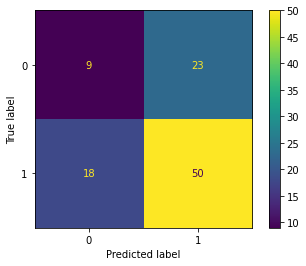

In [388]:
plot_confusion_matrix(myLogit, Xz_test, y_test)

My model performed pretty well. My accuracy score was above 0.5, and the confusion matrix shows that the model got it right fairly often, only missing on 32 of the 100 times.

In [396]:
# 2.1
def calc_og(GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, coefs):
    return(np.sum(np.array([GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, 1]) * coefs))

In [401]:
grescore = 0.6

og = calc_og(grescore, 0.05, 0.65, 1.02, 0.25, 0.75, 1, coef["Coefficients"])
print ("Log Odds for Student 1: " + str(og))

og2 = calc_og(grescore + 1, 0.05, 0.65, 1.02, 0.25, 0.75, 1, coef["Coefficients"])
print ("Log Odds for Student 2: " + str(og2))

print("The difference in log odds is: "+ str(og2-og))

Log Odds for Student 1: 4.52451912895571
Log Odds for Student 2: 5.562953472594755
The difference in log odds is: 1.0384343436390449


The difference is about 1, more specifically 1.038435. This is familiar to the increase from student 1 to student 2 in there GRE Score, which was a standard deviation increase. 

In [417]:
# odds
def calc_od(GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, coefs):
    return(np.exp(np.sum(np.array([GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, 1]) * coefs)))

In [435]:
grescore2 = 0.60

od = calc_od(grescore2, 0.05, 0.65, 1.02, 0.25, 0.75, 1, coef["Coefficients"])
print("Odds for Student 1: " + str(od))

od2 = calc_od(grescore2 + 1, 0.05, 0.65, 1.02, 0.25, 0.75, 1, coef["Coefficients"])
print("Odds for Student 2: " + str(od2))

print("The ratio of odds is: " + str(od2/od))

Odds for Student 1: 92.25155405982535
Odds for Student 2: 260.5913502833369
The ratio of odds is: 2.8247908985288506


The ratio that I got for my odds is 2.825, which doesn't look that familiar. 

In [436]:
def calc_p(GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, coefs):
    odds = np.exp(np.sum(np.array([GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, 1]) * coefs))
    return (odds/(1+odds))

In [437]:
grescore3 = 0.60

p = calc_p(grescore3, 0.05, 0.65, 1.02, 0.25, 0.75, 1, coef["Coefficients"])
print ("Probability for Student 1: " + str(p))

p2 = calc_p(grescore3 + 1, 0.05, 0.65, 1.02, 0.25, 0.75, 1, coef["Coefficients"])
print ("Probability for Student 1: " + str(p2))

print("The difference in probability is: " + str(p2 - p))
print("The change in probability is: " + str(p2/p))

Probability for Student 1: 0.9892763181259322
Probability for Student 1: 0.996177243632418
The difference in probability is: 0.0069009255064858
The change in probability is: 1.0069757310268568


In [438]:
# 2.2
def calc_og(GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, coefs):
    return(np.sum(np.array([GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, 1]) * coefs))

In [439]:
grescore = -1.25

og = calc_og(grescore, 0.24, 0.56, -1, -0.1, 0, 0, coef["Coefficients"])
print ("Log Odds for Student 3: " + str(og))

og2 = calc_og(grescore + 1, 0.24, 0.56, -1, -0.1, 0, 0, coef["Coefficients"])
print ("Log Odds for Student 4: " + str(og2))

print("The difference in log odds is: "+ str(og2-og))

Log Odds for Student 3: 0.31440441870309144
Log Odds for Student 4: 1.3528387623421363
The difference in log odds is: 1.0384343436390449


The difference between the log odds for Student 3 and Student 4 is 1.038435, which is similar to the concept of a one standard deviation increase in the GRE Score.

In [428]:
def calc_od(GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, coefs):
    return(np.exp(np.sum(np.array([GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, 1]) * coefs)))

In [429]:
grescore2 = -1.25

od = calc_od(grescore2, 0.24, 0.56, -1, -0.1, 0, 0, coef["Coefficients"])
print("Odds for Student 3: " + str(od))

od2 = calc_od(grescore2 + 1, 0.24, 0.56, -1, -0.1, 0, 0, coef["Coefficients"])
print("Odds for Student 4: " + str(od2))

print("The ratio of odds is: " + str(od2/od))

Odds for Student 3: 1.3694434531184272
Odds for Student 4: 3.868391402418854
The ratio of odds is: 2.824790898528851


The ratio of odds for Student 3 and Student 4 is 2.82479. 

In [430]:
def calc_p(GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, coefs):
    odds = np.exp(np.sum(np.array([GRE_Score, TOEFL_Score, SOP, LOR, CGPA, University_Rating, Research, 1]) * coefs))
    return (odds/(1+odds))

In [434]:
grescore3 = -1.25

p = calc_p(grescore3, 0.24, 0.56, -1, -0.1, 0, 0, coef["Coefficients"])
print ("Probability for Student 3: " + str(p))

p2 = calc_p(grescore3 + 1, 0.24, 0.56, -1, -0.1, 0, 0, coef["Coefficients"])
print ("Probability for Student 4: " + str(p2))

print("The difference in probability is: " + str(p2 - p))
print("The change in probability is: " + str(p2/p))

Probability for Student 3: 0.5779599641072257
Probability for Student 4: 0.7945933436035666
The difference in probability is: 0.21663337949634087
The change in probability is: 1.3748241970894546


# 2.3.1
The difference in log odds between the pairs of students was the same. 

# 2.3.2
The ratio of odds for both pairs of students was also the same. 

# 2.3.3
Both the difference in probability and the change in probability between the two pairs was different, with both values being higher for both metrics with the pair of Students 3 and 4. 